# Entire DB Schema Statistics for different datasets

**[Note] Statistics should be conducted AFTER postprocessing**

In [53]:
import os
import json
import matplotlib.pyplot as plt

In [54]:
# Config of paths
with open('../config/path_config.json') as config_file:
    path_config = json.load(config_file)

In [55]:
def plot_statistic_distribution(filepath: str, statistic: str):
    with open(filepath, 'r', encoding='utf-8') as file:
        schema_data = json.load(file)

    # Extract the required statistics
    statistic_values = [database.get(statistic, 0) for database in schema_data]
    
    # Calculate the frequency distribution of the statistic
    value_counts = {}
    for value in statistic_values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    
    # Extract abscissa and ordinate data
    x_values = sorted(value_counts.keys())
    y_values = [value_counts[x] for x in x_values]

    # Draw a histogram
    plt.figure(figsize=(10, 3))
    plt.bar(x_values, y_values, width=0.8, color='skyblue', edgecolor='black')
    plt.xlabel(statistic)
    plt.ylabel('Count')
    plt.title(f'Distribution of {statistic}')
    plt.xticks(x_values)
    plt.grid(axis='y')
    plt.tight_layout()

    plt.show()

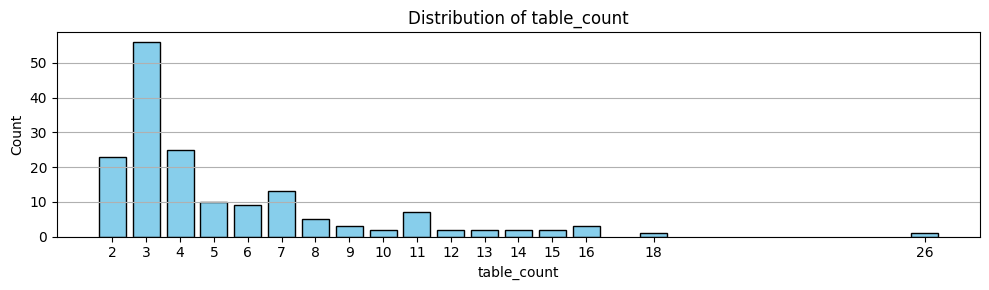

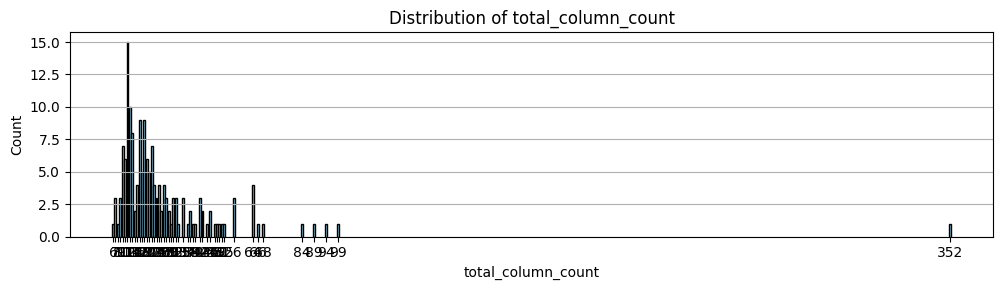

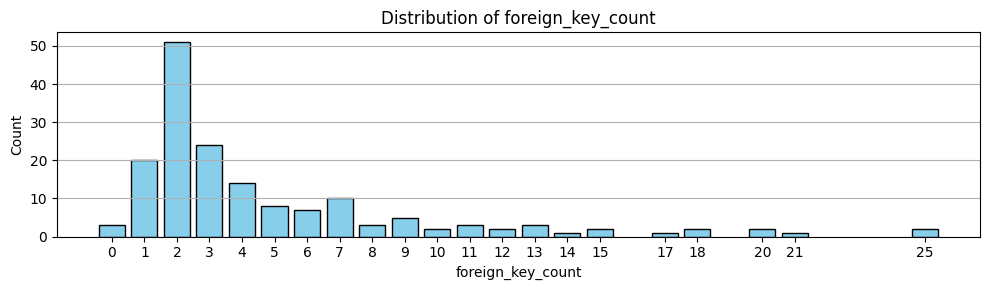

In [56]:
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider_schemas']), 'foreign_key_count')

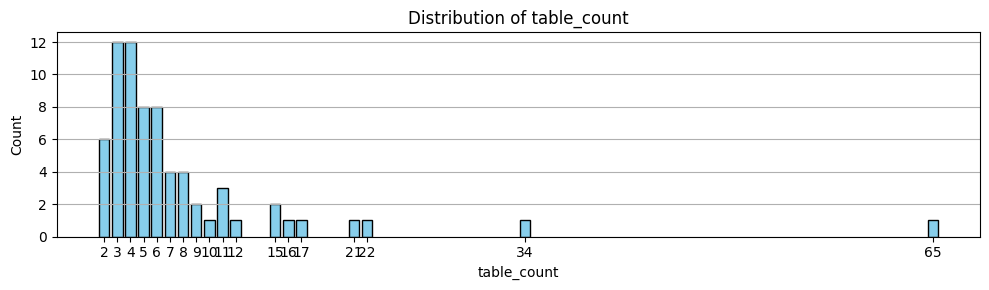

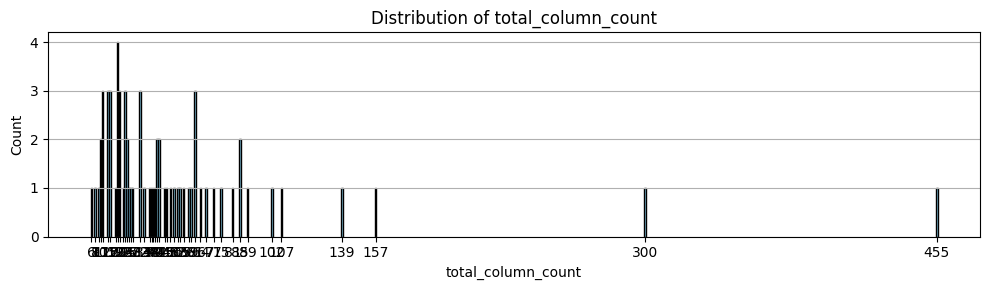

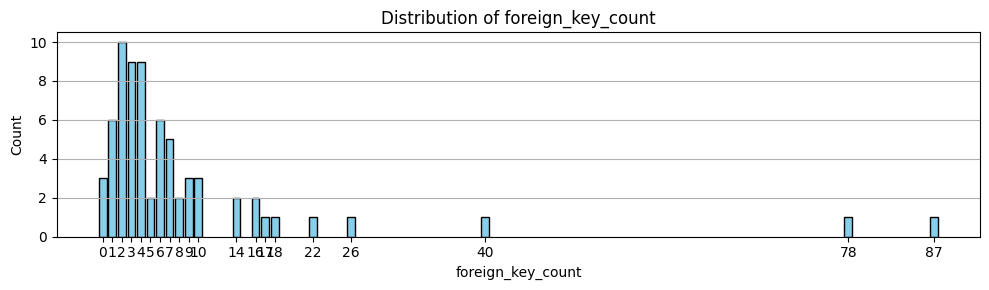

In [57]:
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_train_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_train_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_train_schemas']), 'foreign_key_count')

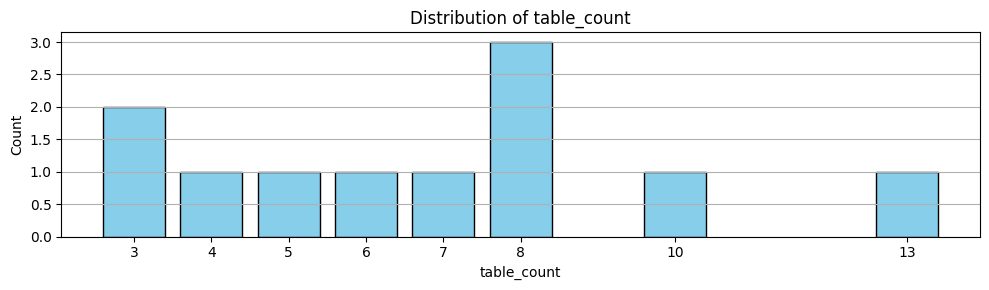

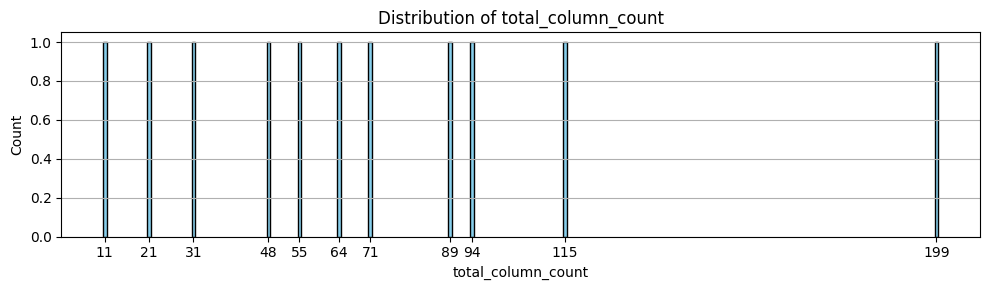

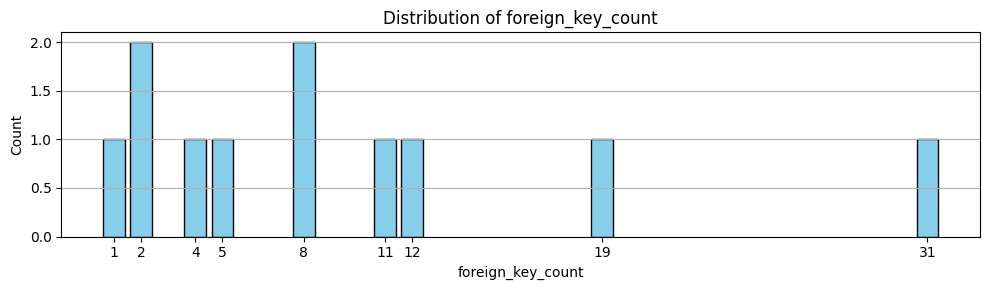

In [58]:
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_dev_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_dev_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['bird_dev_schemas']), 'foreign_key_count')

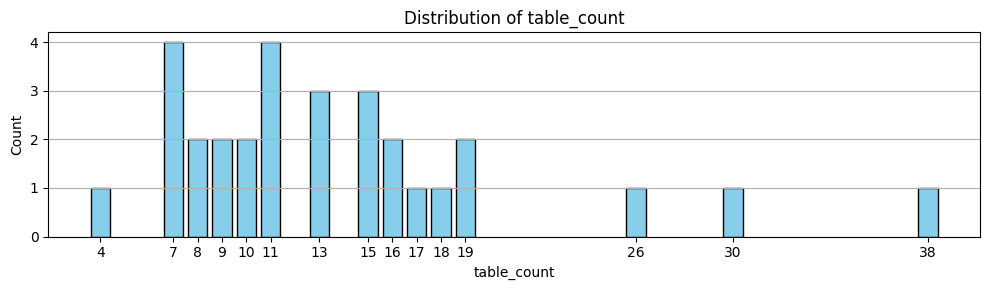

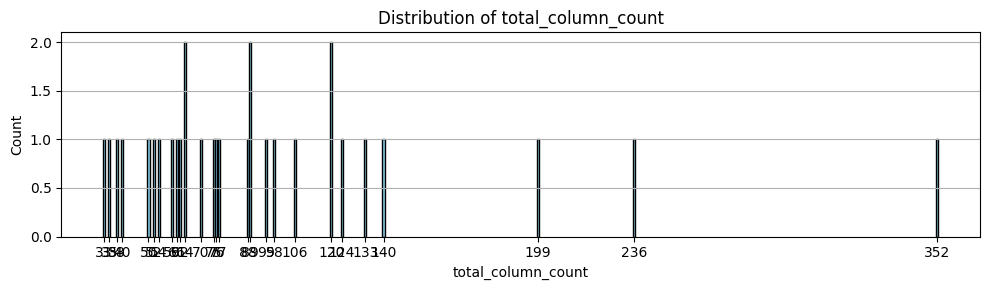

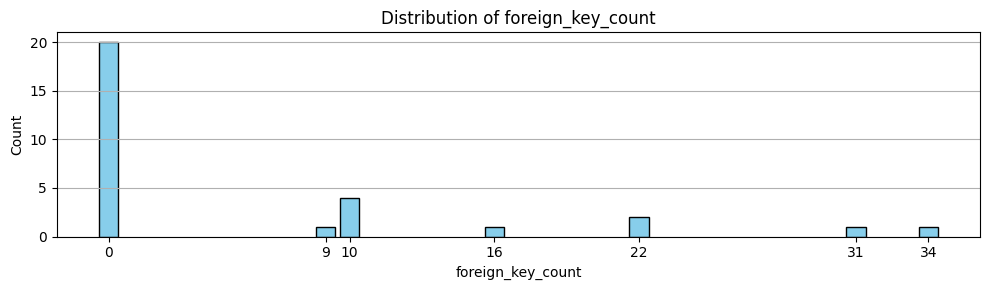

In [59]:
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider2_lite_schemas']), 'table_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider2_lite_schemas']), 'total_column_count')
plot_statistic_distribution(os.path.join("..", path_config['db_schema_paths']['spider2_lite_schemas']), 'foreign_key_count')